## Instacart Grocery Basket Analysis

### Data Sources

#### * “The Instacart Online Grocery Shopping Dataset 2017”, Open Data Source. Accessed from https://www.instacart.com/datasets/grocery-shopping-2017 on [01-July-2021]  - NOTE: Customer data set and “prices” column in the products data set were both fabricated by Career Foundry for the purpose of this study project. 
#### * "USA Regional Data". Accessed from https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States on [28-July-2021]. The regions and states copied into Excel and saved as a cvs format.

### Data Security and Privacy Information 

#### * Even though the data provided for this study exercise does not include real people, any information that can be used to distinguish or trace an individual's identity will be removed prior to data analysis as per UK General Data Protection Regulation (UK GDPR). This includes customers’ first and last names. Source:  https://ico.org.uk/for-organisations/guide-to-data-protection/guide-to-the-general-data-protection-regulation-gdpr/key-definitions/what-is-personal-data/ on [28-July-2021].

#### * Security; the main data is from open source and it does not include any sensitive information, data is stored in Jupyter.

### This script contains the following points;

### 1. Importing Data and Libraries and Removing Variables 

### 2. Merging Data          
         
### 3. Regional Segmentation

    3.1 Sample Dataframe
    3.2 Spending Habits in the Different U.S Regions

### 4. Customers' Profiles 
    
    4.1 Low-activity Customers - Customers With Less Than 5 Orders
    4.2 Customer Household Profiles (Age and Number of Dependants)
    4.3 Sample Dataframe
    4.4 Relationship between Customers' Household Types, Incomes and Loyalty Profiles
    4.5 General Buying Habits Based on Household Types, Loyalty Profiles and Regions
    4.6 Meat and Non-Meat Buyers Based on Household type, Incomes and Loyalty Profiles
    

### 5. Exporting Data¶




## 1. Importing Data and Libraries

In [1]:
# import data and libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\senja\OneDrive\Documents\5. Learning\4. Data Analytics Immersion\Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\senja\\OneDrive\\Documents\\5. Learning\\4. Data Analytics Immersion\\Instacart Basket Analysis'

In [4]:
#import merged customer, product and orders pkl file (exported on task 4.8)

merged_cop = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_cop.pkl'))

In [5]:
# check the data 

merged_cop.shape

(32434212, 33)

In [6]:
merged_cop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 33 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   product_id                   int64   
 1   product_name                 object  
 2   aisle_id                     int64   
 3   department_id                int64   
 4   prices                       float64 
 5   order_id                     int64   
 6   user_id                      int64   
 7   order_number                 int64   
 8   orders_day_of_week           int64   
 9   order_hour_of_day            int64   
 10  days_since_prior_order       float64 
 11  add_to_cart_order            int64   
 12  reordered                    int64   
 13  _merge                       category
 14  price_range_loc              object  
 15  Busiest day                  object  
 16  Busiest days                 object  
 17  busiest_period_of_day_range  object  
 18  max_order           

In [7]:
# remove "_merge" column from merged_cop data frame

merged_cop.drop(columns = '_merge', axis =1, inplace = True)

In [8]:
# remove columns with customer names from merged_cop due to data privacy 

merged_cop.drop(columns = ['first_name', 'last_name'], axis =1, inplace = True)

In [9]:
# check the columns

merged_cop.shape

(32434212, 30)

In [10]:
merged_cop.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'Busiest day', 'Busiest days',
       'busiest_period_of_day_range', 'max_order', 'loyalty_flag',
       'mean_price', 'Spender_flag', 'median_order_frequency',
       'Frequency_flag', 'sex', 'us_state', 'age', 'date_joined',
       'no_dependants', 'marital_status', 'income'],
      dtype='object')

In [11]:
#import new data frame incl. usa regions

df_regions = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'us_regions.csv'))

In [12]:
df_regions

,us_region,us_state
0,R1_Northeast,Maine
1,R1_Northeast,New Hampshire
2,R1_Northeast,Vermont
3,R1_Northeast,Massachusetts
4,R1_Northeast,Rhode Island
5,R1_Northeast,Connecticut
6,R1_Northeast,New York
7,R1_Northeast,Pennsylvania
8,R1_Northeast,New Jersey
9,R2_Midwest,Wisconsin


### 2. Merging Data

In [13]:
# merge us_regions with the merged_cop data frame

df_merged_all = merged_cop.merge(df_regions, on = 'us_state', indicator = True)

In [14]:
# check the data

df_merged_all.shape

(32434212, 32)

In [15]:
df_merged_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,Frequency_flag,sex,us_state,age,date_joined,no_dependants,marital_status,income,us_region,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,R2_Midwest,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,R2_Midwest,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,R2_Midwest,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,R2_Midwest,both
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,R2_Midwest,both


In [16]:
# checking missing values on us_state

df_nan = df_merged_all[df_merged_all['us_state'].isnull() == True]

In [17]:
df_nan

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,Frequency_flag,sex,us_state,age,date_joined,no_dependants,marital_status,income,us_region,_merge


In [18]:
# checking column titles

df_merged_all.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'Busiest day', 'Busiest days',
       'busiest_period_of_day_range', 'max_order', 'loyalty_flag',
       'mean_price', 'Spender_flag', 'median_order_frequency',
       'Frequency_flag', 'sex', 'us_state', 'age', 'date_joined',
       'no_dependants', 'marital_status', 'income', 'us_region', '_merge'],
      dtype='object')

In [19]:
df_merged_all.groupby('us_region').agg({'orders_day_of_week': ['mean', 'sum']})

orders_day_of_week          
                           mean       sum
us_region                                
R1_Northeast           2.734921  15666577
R2_Midwest             2.738646  20824142
R3_South               2.740641  29603339
R4_West                2.739261  22737085

### 3. Regional Segmentation¶


### 3.1 Sample Datafame

In [20]:
# creating subset data frame

np.random.seed(4)

In [21]:
#create a list holding true/false values to test np.random.rand() <= 0.7

dev = np.random.rand(len(df_merged_all)) <= 0.7

In [22]:
dev

array([False,  True, False, ..., False,  True,  True])

In [23]:
# store 70% of the sample in the dataframe big

big = df_merged_all[dev]

In [24]:
# store 30% of the sample in the dataframe small

small = df_merged_all[~dev]

In [25]:
len(df_merged_all)

32434212

In [26]:
len(big)+ len(small)

32434212

### 3.2 Spending Habits in the Different U.S Regions

In [27]:
# create the subset from small dataframe with usa regions and  number of orders

df_101 = small[['us_region','order_number']]

In [28]:
df_101

,us_region,order_number
0,R2_Midwest,28
2,R2_Midwest,1
3,R2_Midwest,10
6,R2_Midwest,23
10,R2_Midwest,5
...,...,...
32434188,R3_South,3
32434191,R3_South,3
32434199,R3_South,2
32434204,R3_South,1


In [29]:
# checking frequency for the number of customers in each region - the small subset data frame 

df_101['us_region'].value_counts(dropna = False)

R3_South        3238852
R4_West         2489611
R2_Midwest      2283094
R1_Northeast    1718172
Name: us_region, dtype: int64

In [30]:
# applying the function into the main dataframe

df_merged_all['us_region'].value_counts(dropna = False)

R3_South        10801610
R4_West          8300445
R2_Midwest       7603810
R1_Northeast     5728347
Name: us_region, dtype: int64

In [31]:
# group the subset data incl. mean, min and max values for orders

df_101.groupby('us_region').agg({'order_number': ['mean', 'sum','count']})

order_number                   
                     mean       sum    count
us_region                                   
R1_Northeast    17.210328  29570303  1718172
R2_Midwest      16.921542  38633471  2283094
R3_South        17.149049  55543231  3238852
R4_West         17.275018  43008076  2489611

In [32]:
df_101.describe()

,order_number
count,9.729729e+06
mean,1.713872e+01
std,1.753208e+01
min,1.000000e+00
25%,5.000000e+00
50%,1.100000e+01
75%,2.400000e+01
max,9.900000e+01


In [33]:
# check the data on the main dataframe

df_merged_all.groupby(['us_region']).agg({'order_number':['sum']})

,order_number
,sum
us_region,
R1_Northeast,98617491
R2_Midwest,128692591
R3_South,185248791
R4_West,143425956


The most orders are made in South Region followed by West and Midwest. The lowest number of orders have placed in Northwest. 
This is line with number of customers in each regions as shown earlier (R3_South; 10,801,610, R4_West 8,300,445, 
R2_Midwest 7,603,810 and R1_Northeast 572,8347)

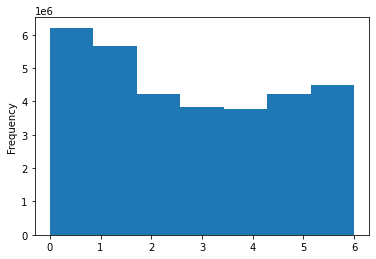

In [34]:
# create the histogram to check orders by days

hist_order_frequency_days = df_merged_all['orders_day_of_week'].plot.hist(bins = 7)

The Histogram shows that the weekend is the busiest time when the online orders have been placed. Saturday (=0) is the busiest day of the weekfollowed by Sunday (= 1). Tuesday(3) and Wednesday (4)are the less busiest days.

In [35]:
hist_order_frequency_days.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_2_orders_day_frequency.png'))

In [36]:
crosstab_orders_departments = pd.crosstab(df_merged_all['department_id'], df_merged_all['order_hour_of_day'], dropna = False)

In [37]:
crosstab_orders_departments

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
department_id,,,,,,,,,,,,,,,,,,,,,
1,15650,8950,5440,4080,4145,6474,19317,56794,105067,146841,...,186122,189300,185375,161407,131427,101550,74253,54898,42965,27762
2,247,139,119,70,63,102,324,910,1818,2643,...,3036,3025,2823,2548,1987,1517,1105,857,662,425
3,7326,3754,2405,1831,1920,3102,10807,34157,63970,89319,...,98147,98313,94036,77377,59747,45191,34143,27219,21217,13452
4,68393,35050,20016,14357,15341,26896,87204,268657,510782,714001,...,786408,776735,735083,594432,462060,355431,287986,247674,202342,126476
5,501,318,255,193,198,268,695,2120,5271,10373,...,15095,15146,14294,12101,8818,5846,3358,1985,1408,899
6,1885,1029,596,503,468,701,2226,6419,12590,18512,...,23172,23215,21909,17636,13352,10098,7875,6474,5545,3581
7,17549,10025,6195,4703,4791,7443,22966,68826,140170,218950,...,221620,218864,209731,174734,138202,105627,75744,55832,43394,29896
8,683,424,261,256,275,316,981,2477,4519,6376,...,7903,7902,8180,7395,6228,4741,3006,1996,1435,990
9,5892,3073,1815,1315,1446,2169,7559,23147,42996,59124,...,74081,73996,70274,58039,44859,33998,26037,21744,17749,10789


In [38]:
df_merged_all['department_id'].value_counts(dropna = False)

4     9479291
16    5414016
19    2887550
7     2688159
1     2236432
13    1875577
3     1176787
15    1068058
20    1051249
9      866627
17     738666
14     710647
12     708931
11     447691
18     423802
6      269253
5      153743
8       97724
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

## 4. Customers' Profiles

* Low activity customers, those who bought less than 5 times in a year, to be removed from analyses as requested by Stakeholders.
* Household profiles based on the age and their dependant status. 
* Links between Customers' incomes, household profiles and their loyalty status.
* The analysis look at the overall order and spending habits and which type of products are the most popular according to the deparments. In addition, the analyses provide the data of meat and non-meat buyers due to a growning trend on Vegatarism. This information can be utilised for marketing purposes. 
 

### 4.1 Low-Activity Customers - Customers With Less Than 5 Orders

* Request: exclude low-activity customers (customers with less than 5 orders) from the data. Export this data

In [39]:
# Creating the order flag to identify customers who ordered less than 5 times

def order_label(row):

  if row['order_number'] < 5:
    return 'Low-Activity-Customers'
  elif row['order_number'] >= 5:
    return 'High-Activity-Customers'
  else: return 'Not enough data'

In [40]:
# apply the function

df_merged_all['order_range'] = df_merged_all.apply(order_label, axis=1)

In [41]:
df_merged_all['order_range'].value_counts(dropna = False)

High-Activity-Customers    24436791
Low-Activity-Customers      7997421
Name: order_range, dtype: int64

In [42]:
# crosstab

crosstab_region_spenders = pd.crosstab(df_merged_all['us_region'], df_merged_all['order_range'], dropna = False)

In [43]:
crosstab_region_spenders

order_range,High-Activity-Customers,Low-Activity-Customers
us_region,,
R1_Northeast,4319468,1408879
R2_Midwest,5716510,1887300
R3_South,8136355,2665255
R4_West,6264458,2035987


In [44]:
df_merged_all.loc[df_merged_all['order_number'] >= 5 , 'Activity_Flag'] = 'High_Activity'

In [45]:
df_merged_all.loc[df_merged_all['order_number'] < 5,'Activity_Flag'] = 'Low_Activity'

In [46]:
#Check frequency of the 'Activity_Flag' column

df_merged_all['Activity_Flag'].value_counts(dropna=False)

High_Activity    24436791
Low_Activity      7997421
Name: Activity_Flag, dtype: int64

In [47]:
#Create dataframe for low_activity customers only

df_low_activity = df_merged_all[df_merged_all.Activity_Flag == 'Low_Activity']

In [48]:
#check the low_activity dataframe

df_low_activity.shape

(7997421, 34)

In [49]:
# export low_activity customer data 

df_low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'df_low_activity_customers_4_10.pkl'))

In [50]:
# create a new final dataframe without low activity customers 

df_final = df_merged_all[df_merged_all.Activity_Flag == 'High_Activity']

In [51]:
df_final.shape

(24436791, 34)

In [52]:
df_final['order_range'].value_counts(dropna = False)

High-Activity-Customers    24436791
Name: order_range, dtype: int64

In [53]:
df_final.groupby(['us_region']).agg({'us_region': ['count']})

,us_region
,count
us_region,
R1_Northeast,4319468
R2_Midwest,5716510
R3_South,8136355
R4_West,6264458


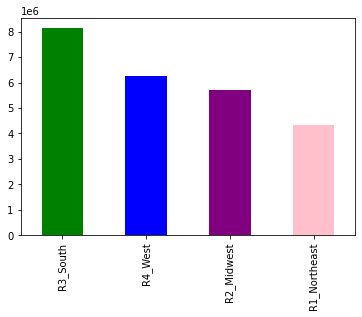

In [54]:
# the total customers in each region

Bar101 = df_final['us_region'].value_counts().plot.bar(color =['green', 'blue', 'purple', 'pink'])


In [55]:
Bar101.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar101_regions_customers.png'))

#### NOTE: df_final dataframe will be used for the rest of the analysis

 ### 4.2 Customer Household Profiles  (Age and Number of Dependants)

* Background; based on the previous analysis, over 40s have the highest buying power according to their income. No separate group for the adults on the retirement age (65 and over) as there is no differences on their income level with those who are 41-64. The under 30s selected to understand whether younger customers have different shopping habits than older customers.
* Household profiling consists of two factors; customers' ages and whether they have dependants.  
* Customers are divided into 3 age groups; Over 40s, 30-40 Years and Under 30s, each age group have been divided into two separate categories whether customers are parents or not.


In [56]:
df_final.loc[((df_final['no_dependants'] >= 1) & (df_final['age'] < 30)), 'Household_Range'] = 'U30 Young Parents'

C:\Users\senja\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\senja\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [57]:
df_final.loc[((df_final['no_dependants'] < 1) & (df_final['age'] < 30)), 'Household_Range'] = 'U30 Adults No Kids'

C:\Users\senja\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [58]:
df_final.loc[((df_final['no_dependants'] >= 1) & (df_final['age'] <= 40) & (df_final['age'] >= 30)), 'Household_Range'] = 'Y30-40 Parents'

C:\Users\senja\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [59]:
df_final.loc[((df_final['no_dependants'] < 1) & (df_final['age'] <= 40) & (df_final['age'] >= 30)), 'Household_Range'] = 'Y30-40 Adults No Kids'

C:\Users\senja\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [60]:
df_final.loc[((df_final['no_dependants'] >= 1) & (df_final['age'] > 40)), 'Household_Range'] = 'O40 Older Parents'

C:\Users\senja\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [61]:
df_final.loc[((df_final['no_dependants'] < 1) & (df_final['age'] > 40)), 'Household_Range'] = 'O40 Adults No Kids'

C:\Users\senja\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [62]:
df_final['Household_Range'].value_counts(dropna = False)

O40 Older Parents        11706321
O40 Adults No Kids        3922907
U30 Young Parents         3455342
Y30-40 Parents            3164341
U30 Adults No Kids        1139197
Y30-40 Adults No Kids     1048683
Name: Household_Range, dtype: int64

In [63]:
# crosstab - the number of household in each us region

crosstab_1 = pd.crosstab(df_final['Household_Range'], df_final['us_region'], dropna = False)

In [64]:
crosstab_1

us_region,R1_Northeast,R2_Midwest,R3_South,R4_West
Household_Range,,,,
O40 Adults No Kids,682236,928666,1294052,1017953
O40 Older Parents,2091487,2746313,3857677,3010844
U30 Adults No Kids,208041,260061,388712,282383
U30 Young Parents,604518,809024,1159133,882667
Y30-40 Adults No Kids,175906,249531,357492,265754
Y30-40 Parents,557280,722915,1079289,804857


### 4.3 Relationships between Customers' Household Types, Incomes and Loyalty Profiles  


* loyalty_flag - the loyal customers are those who have ordered 36 times or more. Regular customers are those who placed less than 36 but more than 12 orders and New customers are those who have ordered 12 times or less (but min 5).
* Household_Range - includes age groups and information whether customers are parents or not as per settings on the previous section 4.2

#### Income Data - Customers's Buying Power based on Households and Loyality - All Regions

In [65]:
df_final.groupby('loyalty_flag').agg({'income': ['mean','min', 'max','count']})

income                         
                           mean    min     max     count
loyalty_flag                                            
Loyal customer    100351.692059  25955  593901   9564400
New customer       97630.292953  25903  590790   2116621
Regular customer   99922.940111  25972  592409  12755770

In [66]:
df_final.groupby('Household_Range').agg({'income': ['mean','min', 'max','count']})

income                         
                                mean    min     max     count
Household_Range                                              
O40 Adults No Kids     116663.677421  29011  584097   3922907
O40 Older Parents      116154.770445  29001  593901  11706321
U30 Adults No Kids      70648.268336  25979  385324   1139197
U30 Young Parents       70913.434588  25937  396364   3455342
Y30-40 Adults No Kids   70587.729642  25903  387860   1048683
Y30-40 Parents          70820.967770  25911  397929   3164341

In [67]:
# regional income differences based on household range

df_final.groupby(['Household_Range', 'us_region']).agg({'income': ['mean']})

income
                                             mean
Household_Range       us_region                  
O40 Adults No Kids    R1_Northeast  116722.292995
                      R2_Midwest    116349.129177
                      R3_South      116864.468490
                      R4_West       116656.099978
O40 Older Parents     R1_Northeast  115959.504494
                      R2_Midwest    117593.349667
                      R3_South      115519.424960
                      R4_West       115792.269115
U30 Adults No Kids    R1_Northeast   69508.972227
                      R2_Midwest     73226.515133
                      R3_South       70774.167803
                      R4_West        68939.880180
U30 Young Parents     R1_Northeast   71257.110898
                      R2_Midwest     70820.992397
                      R3_South       71064.698369
                      R4_West        70564.146121
Y30-40 Adults No Kids R1_Northeast   71232.693223
                      R2_Midwest     72248.908605
                      R3_South       70027.225138
                      R4_West        69355.037998
Y30-40 Parents        R1_Northeast   70686.195950
                      R2_Midwest     69534.798599
                      R3_South       71367.171612
                      R4_West        71337.065446

### 4.5 Sample Dataframe

In [68]:
# create a subset dataframe from final df; including only required columns - customer details, location, what and when when they order

df_102 = df_final[['user_id', 'income', 'loyalty_flag', 'Household_Range', 'us_region', 'order_number','order_range', 'department_id', 'prices','price_range_loc', 'orders_day_of_week', 'busiest_period_of_day_range']]

In [69]:
df_102.head()

,user_id,income,loyalty_flag,Household_Range,us_region,order_number,order_range,department_id,prices,price_range_loc,orders_day_of_week,busiest_period_of_day_range
0,138,49620,Regular customer,O40 Older Parents,R2_Midwest,28,High-Activity-Customers,19,5.8,Mid-range product,6,Most Orders
1,138,49620,Regular customer,O40 Older Parents,R2_Midwest,30,High-Activity-Customers,19,5.8,Mid-range product,6,Average Orders
3,138,49620,Regular customer,O40 Older Parents,R2_Midwest,10,High-Activity-Customers,12,20.0,High-range product,5,Most Orders
4,138,49620,Regular customer,O40 Older Parents,R2_Midwest,9,High-Activity-Customers,10,12.9,Mid-range product,6,Most Orders
5,138,49620,Regular customer,O40 Older Parents,R2_Midwest,17,High-Activity-Customers,4,1.7,Low-range product,5,Most Orders


In [70]:
df_102.shape

(24436791, 12)

### 4.5 General Buying Habits Based on Household Types, Loyalty Profiles and Regions

In [71]:
# the statistical data for orders as per housegold in each region

df_102.groupby(['Household_Range', 'us_region']).agg({'order_number': ['sum', 'count','mean','min','max']})

order_number                            
                                            sum    count       mean min max
Household_Range       us_region                                            
O40 Adults No Kids    R1_Northeast     14893393   682236  21.830265   5  99
                      R2_Midwest       20824158   928666  22.423733   5  99
                      R3_South         28747008  1294052  22.214724   5  99
                      R4_West          22782712  1017953  22.380908   5  99
O40 Older Parents     R1_Northeast     46124020  2091487  22.053219   5  99
                      R2_Midwest       59108663  2746313  21.522916   5  99
                      R3_South         83857572  3857677  21.737842   5  99
                      R4_West          66592587  3010844  22.117581   5  99
U30 Adults No Kids    R1_Northeast      4504555   208041  21.652246   5  99
                      R2_Midwest        5633242   260061  21.661233   5  99
                      R3_South          8599771   388712  22.123760   5  99
                      R4_West           6075690   282383  21.515778   5  99
U30 Young Parents     R1_Northeast     13687638   604518  22.642234   5  99
                      R2_Midwest       17282846   809024  21.362588   5  99
                      R3_South         25633280  1159133  22.114184   5  99
                      R4_West          19195040   882667  21.746638   5  99
Y30-40 Adults No Kids R1_Northeast      3902025   175906  22.182444   5  99
                      R2_Midwest        5272504   249531  21.129655   5  99
                      R3_South          7766575   357492  21.725171   5  99
                      R4_West           6042557   265754  22.737408   5  99
Y30-40 Parents        R1_Northeast     12055107   557280  21.632047   5  99
                      R2_Midwest       15940135   722915  22.049805   5  99
                      R3_South         24109355  1079289  22.338183   5  99
                      R4_West          17746333   804857  22.049051   5  99

In [72]:
# crosstab - the customer loyalty types in each region

crosstab_2 = pd.crosstab(df_final['loyalty_flag'], df_final['us_region'], dropna = False)

In [73]:
crosstab_2

us_region,R1_Northeast,R2_Midwest,R3_South,R4_West
loyalty_flag,,,,
Loyal customer,1712707,2206633,3165873,2479187
New customer,370592,499997,703085,542947
Regular customer,2236169,3009880,4267397,3242324


In [74]:
# crosstab - the number of household types in each region 

crosstab_3 = pd.crosstab(df_102['Household_Range'], df_102['us_region'], dropna = False)

In [75]:
crosstab_3

us_region,R1_Northeast,R2_Midwest,R3_South,R4_West
Household_Range,,,,
O40 Adults No Kids,682236,928666,1294052,1017953
O40 Older Parents,2091487,2746313,3857677,3010844
U30 Adults No Kids,208041,260061,388712,282383
U30 Young Parents,604518,809024,1159133,882667
Y30-40 Adults No Kids,175906,249531,357492,265754
Y30-40 Parents,557280,722915,1079289,804857


In [76]:
# crosstab - relationship between household types and department ids

crosstab_4 = pd.crosstab(df_102['department_id'], df_102['Household_Range'], dropna = False)

In [77]:
crosstab_4

Household_Range,O40 Adults No Kids,O40 Older Parents,U30 Adults No Kids,U30 Young Parents,Y30-40 Adults No Kids,Y30-40 Parents
department_id,,,,,,
1,264195,781681,73204,232133,68429,209202
2,4391,12859,1306,4154,1238,3218
3,142855,425174,41097,125457,38532,113583
4,1162611,3456721,338013,1015690,312261,941795
5,18175,49464,4710,16236,5093,14324
6,31930,93807,9595,28135,8513,25920
7,328162,983172,95329,283329,88567,257907
8,11715,34455,3463,10503,3072,8907
9,101336,303807,29988,90458,26090,82046


In [78]:
# check the frequency for all departments and find out what are the most popular one

df_102['department_id'].value_counts(dropna = False)

4     7227091
16    4132060
19    2187121
7     2036466
1     1628844
13    1385520
3      886698
15     787790
20     783011
9      633725
17     539349
14     530401
12     523891
18     335947
11     328569
6      197900
5      108002
8       72115
21      57567
10      27558
2       27166
Name: department_id, dtype: int64

In [79]:
# df for the 3 most popular departments ( 4 = Produces, 16, dairy & eggs, 19 = snacks)

df_top_3_departments = df_102.loc[df_102['department_id'].isin([4,16,19])]


In [80]:
df_top_3_departments

,user_id,income,loyalty_flag,Household_Range,us_region,order_number,order_range,department_id,prices,price_range_loc,orders_day_of_week,busiest_period_of_day_range
0,138,49620,Regular customer,O40 Older Parents,R2_Midwest,28,High-Activity-Customers,19,5.8,Mid-range product,6,Most Orders
1,138,49620,Regular customer,O40 Older Parents,R2_Midwest,30,High-Activity-Customers,19,5.8,Mid-range product,6,Average Orders
5,138,49620,Regular customer,O40 Older Parents,R2_Midwest,17,High-Activity-Customers,4,1.7,Low-range product,5,Most Orders
6,138,49620,Regular customer,O40 Older Parents,R2_Midwest,23,High-Activity-Customers,19,4.4,Low-range product,5,Most Orders
7,138,49620,Regular customer,O40 Older Parents,R2_Midwest,30,High-Activity-Customers,4,4.3,Low-range product,6,Average Orders
...,...,...,...,...,...,...,...,...,...,...,...,...
32434073,31406,47677,New customer,O40 Adults No Kids,R3_South,5,High-Activity-Customers,16,1.7,Low-range product,1,Most Orders
32434138,160436,148738,Regular customer,O40 Older Parents,R3_South,12,High-Activity-Customers,19,4.7,Low-range product,2,Average Orders
32434189,15443,36089,New customer,U30 Young Parents,R3_South,5,High-Activity-Customers,19,3.4,Low-range product,2,Most Orders
32434192,15443,36089,New customer,U30 Young Parents,R3_South,5,High-Activity-Customers,19,2.1,Low-range product,2,Most Orders


In [81]:
df_top_3_departments.groupby(['us_region']).agg({'department_id': ['sum']})

,department_id
,sum
us_region,
R1_Northeast,24191887
R2_Midwest,31895600
R3_South,45417641
R4_West,35071495


In [82]:
# the top 3 products by household types

crosstab_4a = pd.crosstab(df_102['Household_Range'], df_top_3_departments['department_id'], dropna = False)

In [83]:
crosstab_4a

department_id,4,16,19
Household_Range,,,
O40 Adults No Kids,1162611,662271,349963
O40 Older Parents,3456721,1972859,1045032
U30 Adults No Kids,338013,191925,102356
U30 Young Parents,1015690,588060,310732
Y30-40 Adults No Kids,312261,179109,93120
Y30-40 Parents,941795,537836,285918


In [84]:
# crosstab - top 3 popular departments by regions

crosstab_4b = pd.crosstab(df_102['us_region'], df_top_3_departments['department_id'], dropna = False)

In [85]:
crosstab_4b

department_id,4,16,19
us_region,,,
R1_Northeast,1269360,731845,389733
R2_Midwest,1695851,964899,509148
R3_South,2409221,1375399,724967
R4_West,1852659,1059917,563273


In [86]:
# crossstab - prices ranges and 3 top departments

crosstab_4c = pd.crosstab(df_final['price_range_loc'], df_top_3_departments['department_id'], dropna = False)

In [87]:
crosstab_4c

department_id,4,16,19
price_range_loc,,,
High-range product,0,3711,0
Low-range product,2065086,1090226,1376405
Mid-range product,5162005,3038123,810716


### 4.6 Meat and Non-Meat Buyers Based on Household type, Incomes and Loyalty Profiles


* There is a growning trend on vegetarianism and vegetarians. The purpose is to look at what type of customers are buying meat and who are not, marketing can be targeted accordingly.

In [88]:
# define the meat buyers (department 12 = meat and seafood)

def meat_buyer_label(row):

  if row['department_id'] == 12 and row ['order_number'] >= 1:
    return 'meat_buyer'
  else: return 'non_meat_buyer'

In [89]:
# apply the function into subset

df_102['meat_buyer'] = df_102.apply(meat_buyer_label, axis=1)

<ipython-input-89-0fc750491ecc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_102['meat_buyer'] = df_102.apply(meat_buyer_label, axis=1)


In [90]:
df_102['meat_buyer'].value_counts(dropna=False)

non_meat_buyer    23912900
meat_buyer          523891
Name: meat_buyer, dtype: int64

In [91]:
# crosstab - the number of meat buyers as per household type 

crosstab_5a = pd.crosstab(df_102['Household_Range'], df_102['meat_buyer'], dropna = False)

In [92]:
crosstab_5a

meat_buyer,meat_buyer,non_meat_buyer
Household_Range,,
O40 Adults No Kids,82980,3839927
O40 Older Parents,253495,11452826
U30 Adults No Kids,24053,1115144
U30 Young Parents,74243,3381099
Y30-40 Adults No Kids,21173,1027510
Y30-40 Parents,67947,3096394


In [93]:
# crosstab - the number of meat buyers as per customers' loyalty

crosstab_5b = pd.crosstab(df_102['loyalty_flag'], df_102['meat_buyer'], dropna = False)

In [94]:
crosstab_5b

meat_buyer,meat_buyer,non_meat_buyer
loyalty_flag,,
Loyal customer,187663,9376737
New customer,48910,2067711
Regular customer,287318,12468452


In [95]:
# crosstab - meat and non-meat buyers as per price ranges

crosstab_5c = pd.crosstab(df_102['meat_buyer'], df_102['price_range_loc'], dropna = False)

In [96]:
crosstab_5c

price_range_loc,High-range product,Low-range product,Mid-range product
meat_buyer,,,
meat_buyer,304799,0,219092
non_meat_buyer,3889,7626794,16282217


In [97]:
df_final.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'Busiest day', 'Busiest days',
       'busiest_period_of_day_range', 'max_order', 'loyalty_flag',
       'mean_price', 'Spender_flag', 'median_order_frequency',
       'Frequency_flag', 'sex', 'us_state', 'age', 'date_joined',
       'no_dependants', 'marital_status', 'income', 'us_region', '_merge',
       'order_range', 'Activity_Flag', 'Household_Range'],
      dtype='object')

In [98]:
df_final.shape

(24436791, 35)

In [99]:
df_final.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_final.pkl'))

In [100]:
df_102.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_102_subset_4_10.pkl'))